<a href="https://colab.research.google.com/github/ChirayuSalgarkar/ChirayuSalgarkar/blob/main/Modifications_to_SIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the code that I wrote for the HW assignment. I think this is incorrect, but I'm not sure.

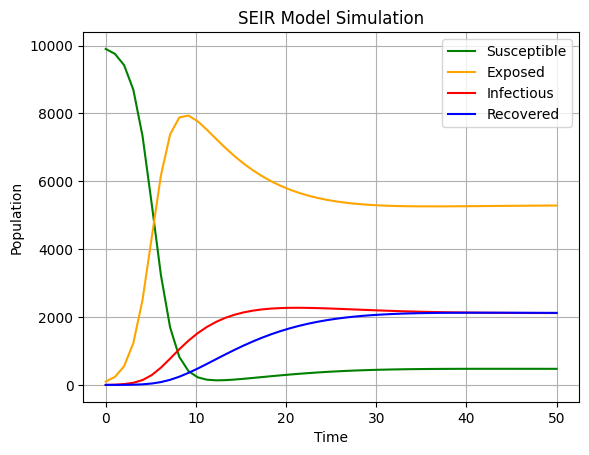

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#Defining diffeqs
def deriv(y, t, N, beta_1, beta_2, beta_3, gamma_1, gamma_2):
    S, E, I, R = y
    dSdt = -beta_1 * S * E / N + -beta_2 * S * I / N + gamma_1 * R
    dEdt = beta_1 * S * E / N + -beta_3 * E + beta_2 * S * I / N
    dIdt = beta_3 * E - gamma_2 * I
    dRdt = gamma_2 * I - gamma_1 * R
    return [dSdt, dEdt, dIdt, dRdt]


def simulate_sir_model(y, t, N, beta_1, beta_2, beta_3, gamma_1, gamma_2):
    return odeint(deriv, y, t, args=(N, beta_1, beta_2, beta_3, gamma_1, gamma_2)).T

N = 10000
y_initial = [9900, 100, 0, 0]
timesteps = np.linspace(0, 50, 50)
beta_1 = 0.9
beta_2 = 0.4
beta_3 = 0.05
gamma_1 = 0.125
gamma_2 = 0.125

S, E, I, R = simulate_sir_model(y_initial, timesteps, N, beta_1, beta_2, beta_3, gamma_1, gamma_2)

plt.plot(timesteps, S, color='green', label='Susceptible')
plt.plot(timesteps, E, color='orange', label='Exposed')
plt.plot(timesteps, I, color='red', label='Infectious')
plt.plot(timesteps, R, color='blue', label='Recovered')

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('SEIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()
